In [1]:
from google.colab import drive 
drive.mount('/content/drive')
%cd drive/My Drive/text_classification

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/text_classification


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [0]:
from pandas import read_csv
df = read_csv('processedDataset.csv',names=['text','target'],error_bad_lines=False,encoding='utf-8')
df = df.dropna()

In [0]:
from sklearn import model_selection
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['text'],df['target'],test_size=0.25,random_state=101)

In [0]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(Train_X)
sequences = tok.texts_to_sequences(Train_X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [0]:
test_sequences = tok.texts_to_sequences(Test_X)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [0]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [0]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(5,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [9]:
model = RNN()
model.summary()
model.compile(loss='sparse_categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
______

In [10]:
history =  model.fit(sequences_matrix,Train_Y,batch_size=128,epochs=10,validation_data=(test_sequences_matrix, Test_Y),validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 81536 samples, validate on 27179 samples
Epoch 1/10





81536/81536 [==============================] - 161s 2ms/step - loss: 0.5741 - acc: 0.7648 - val_loss: 0.2809 - val_acc: 0.9109
Epoch 2/10
81536/81536 [==============================] - 140s 2ms/step - loss: 0.2394 - acc: 0.9292 - val_loss: 0.2214 - val_acc: 0.9340
Epoch 3/10
81536/81536 [==============================] - 153s 2ms/step - loss: 0.2058 - acc: 0.9378 - val_loss: 0.1983 - val_acc: 0.9383
Epoch 4/10
81536/81536 [==============================] - 142s 2ms/step - loss: 0.1915 - acc: 0.9422 - val_loss: 0.1996 - val_acc: 0.9387
Epoch 5/10
81536/81536 [==============================] - 134s 2ms/step - loss: 0.1817 - acc: 0.9448 - val_loss: 0.2038 - val_acc: 0.9401
Epoch 6/10
81536/81536 [==============================] - 163s 2ms/step - loss: 0.1749 - acc: 0.9462 - val_loss: 0.1991 - val_acc: 0.9397
Epoch 7/10
81536/815

In [0]:
#print (np.argmax(model.predict([[test_sequences_matrix[1]]],batch_size=1,verbose = 2)[0])) #example for tomorrow testing
#print (Test_Y[1])

In [12]:
'''from keras.models import load_model
model.save('lstm_model.h5')''' 

"from keras.models import load_model\nmodel.save('lstm_model.h5')"

In [0]:
#import pickle
#with open('tokenizer_lstm.pickle', 'wb') as handle:
#    pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
{'val_loss': [0.2809208398625579, 0.22140780222758477, 0.19827718213609022, 0.19959530247056487, 0.20376442293904293, 0.19911484172650443, 0.2097836578408545, 0.18244487214963023, 0.18796732513389383, 0.1853443080533125], 'val_acc': [0.910923875074714, 0.9339931565052302, 0.9383347437425518, 0.9387026748833898, 0.9400640200395766, 0.9397328820110679, 0.9357592258970401, 0.9406895029491759, 0.9422716067968832, 0.944074469283478], 'loss': [0.5740532642069567, 0.23941039215638835, 0.2058483101193628, 0.19153057769806456, 0.18170598941143118, 0.1749361564099695, 0.16661448845145654, 0.15996421836725958, 0.15545942157717477, 0.14946849610849489], 'acc': [0.7648155416012559, 0.9292214481946625, 0.9378188775510204, 0.9421727825745683, 0.9448096546310832, 0.9462446036106751, 0.9479371075353218, 0.9492371467817896, 0.9507579474097331, 0.9531004709576139]}


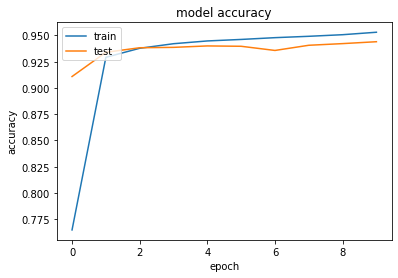

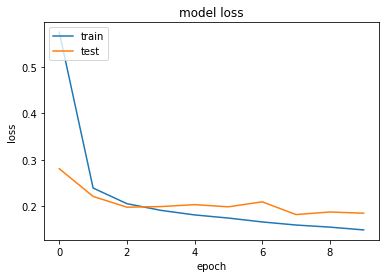

<Figure size 432x288 with 0 Axes>

In [14]:
print(history.history.keys())
# summarize history for accuracy
print (history.history)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('lstm_acc.png')
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('lstm_loss.png')